In [16]:
from numba import njit
import numpy as np
import matplotlib.pyplot as plt

@njit
def Mand(z0, max_steps):
    z = 0j
    m = 1j
    for itr in range(max_steps):
        if abs(z)>2:
            return itr
        z = (abs(np.real(z)) + m*abs(np.imag(z)))**2 + z0
    return max_steps

@njit
def Mandelbrot(ext, Nxy, max_steps):
    data = zeros((Nxy,Nxy))
    for i in range(Nxy):
        for j in range(Nxy):
            x = ext[0] + (ext[1]-ext[0])*i/(Nxy-1.)
            y = ext[2] + (ext[3]-ext[2])*j/(Nxy-1.)
            data[i,j] = Mand(x + y*1j, max_steps)
    return data

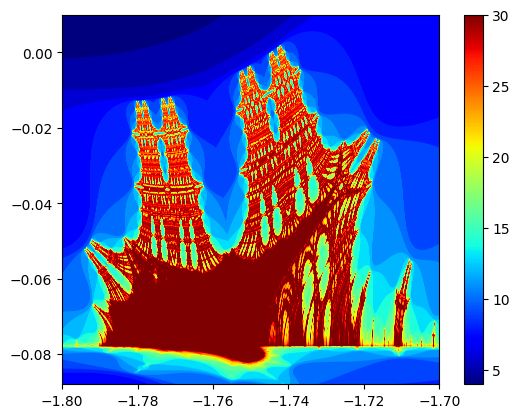

In [36]:
ext = np.array([-1.8, -1.7, -0.088, 0.01], dtype=np.float64)
data = Mandelbrot(ext, 10000, 30)

flipped_data = np.fliplr(data)

plt.imshow(flipped_data.T, extent=[-1.8, -1.7, -0.088, 0.01], cmap='jet', origin='lower')
plt.colorbar()
plt.show()